<a href="https://colab.research.google.com/github/gauravnegi1995/gaurav-ML/blob/main/MNIST_and_webcam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import keras
import tensorflow.keras.callbacks

import time
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [17]:
x_test.shape,x_train.shape

((10000, 28, 28), (60000, 28, 28))

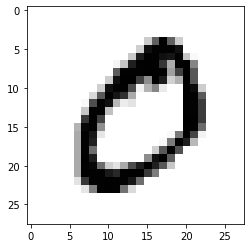

Label :
0


In [29]:
plt.imshow(x_train[1],cmap='binary')
plt.show()

print('Label :' )  
print(y_train[1])

In [37]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [56]:
###normalizing data points
x_train=tf.keras.utils.normalize(x_train,axis=1)

x_test=tf.keras.utils.normalize(x_test,axis=1)


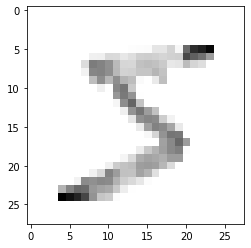

In [57]:
plt.imshow(x_train[0],cmap='binary')

In [62]:
####creating neural network

LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name='Flatten'),
        tf.keras.layers.Dense(180,activation='relu',name='Neuron1'),
        tf.keras.layers.Dense(80,activation='relu',name='Neuron2'),
        tf.keras.layers.Dense(10,activation='softmax',name='output')
        ]


model=tf.keras.models.Sequential(LAYERS) 
model.layers
model.summary()       

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Neuron1 (Dense)              (None, 180)               141300    
_________________________________________________________________
Neuron2 (Dense)              (None, 80)                14480     
_________________________________________________________________
output (Dense)               (None, 10)                810       
Total params: 156,590
Trainable params: 156,590
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=18)

Epoch 1/18
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2716 - accuracy: 0.9187
Epoch 2/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1111 - accuracy: 0.9659
Epoch 3/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9757
Epoch 4/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9825
Epoch 5/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0391 - accuracy: 0.9869
Epoch 6/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0300 - accuracy: 0.9901
Epoch 7/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9922
Epoch 8/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0189 - accuracy: 0.9937
Epoch 9/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0172 - accuracy: 0.9940
Epoch 10/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.014

In [67]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2213 - accuracy: 0.9669


[0.22133970260620117, 0.9668999910354614]

In [88]:
x_new=x_test[0:4]
y_new=y_test[0:4]
y_new


array([7, 2, 1, 0], dtype=uint8)

In [89]:

y_out=model.predict(x_new)

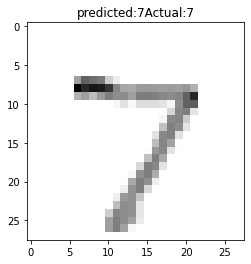

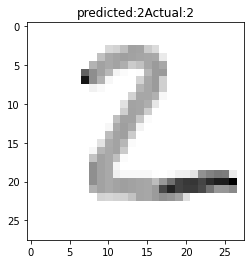

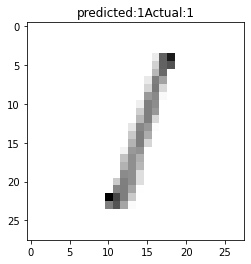

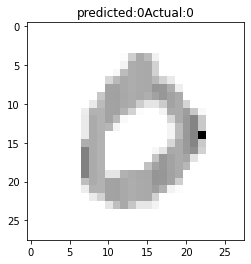

In [90]:
y_pred=np.argmax(y_out,axis=-1)


for data,pred,actual in zip(x_new,y_pred,y_new):
  plt.imshow(data,cmap='binary')
  plt.title(f'predicted:{pred}' f'Actual:{actual}')

  plt.show()